## `Content:`
- 1- **Libararies used**
- 2- **main functions**
- 3- **Evaluation functions**
- 4- **Graph**

## `Libararies used:`

In [141]:
#importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## `Main functions:`

In [142]:
# normalization function should be used instead of standard scalling
def normalization(x):
    mean = np.mean(x, axis=0)
    std = np.std(x, axis=0)
    x_normalized = ((x - mean) / std)
    return x_normalized, mean, std

In [143]:
# to cancel the effect of normalization to represent the actual data
def denormalization(x_normalized,x_mean,x_std):
    x_denormalized=(x_normalized*x_std)+x_mean.flatten()
    return x_denormalized

In [144]:
def linear_reg(x, y, num_iterations, alpha):
    num_samples, num_features = x.shape
    weights = np.zeros((num_features, 1))
    bias = 0

    # Gradient descent
    for i in range(num_iterations):
        y_predict = np.dot(x, weights) + bias
        
        # derivatives
        dw = (1 / num_samples) * np.dot(x.T, (y_predict - y))
        db = (1 / num_samples) * np.sum(y_predict - y)
        
        # updating weights
        weights =weights -(alpha * dw.reshape(-1, 1))
        bias =bias - (alpha * db)

    return weights, bias

In [145]:
# prediction funtion
def predict(x, weights, bias):
    y_pred= np.dot(x, weights) + bias
    return y_pred

In [146]:
# encoding categoral features
def encoding(column):
    unique_values = set(column)
    value_mapping = {value: index for index, value in enumerate(unique_values)}
    encoded_column = [value_mapping[value] for value in column]
    return encoded_column

## `Evaluation functions:`

In [147]:
def r2_score(y, y_predict):
    mean_actual = np.mean(y)
    ssr = np.sum((y - y_predict) ** 2)
    sst = np.sum((y - mean_actual) ** 2)
    r2 = 1 - (ssr / sst)
    return r2

In [148]:
def mean_square_error(y, y_pred):
    return np.mean(np.square(y - y_pred))

In [149]:
def root_mean_square_error(mean_square_error):
    return np.sqrt(mean_square_error)

In [150]:
#Reading data
data = pd.read_csv("C:/Users/DELL/Desktop/Task1/insurance.csv") 
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [151]:
# we have some categoral data that we need to encode
data['smoker'] = encoding(data['smoker'])
data['sex'] = encoding(data['sex'])
data['region'] = encoding(data['region'])

In [152]:
x = data.drop(['charges'] , axis = 1).values
y = data['charges'].values

In [153]:
x.shape, y.shape

((1338, 6), (1338,))

In [154]:
x_normalizaed, x_mean, x_std = normalization(x)
y_normalized, y_mean, y_std = normalization(y.reshape(-1, 1))

In [155]:
x_normalizaed.shape, y_normalized.shape

((1338, 6), (1338, 1))

In [156]:
alpha = 0.1 
num_iterations = 1000

In [157]:
weights, bias = linear_reg(x_normalizaed, y_normalized, num_iterations, alpha)
y_pred = predict(x_normalizaed, weights, bias)

In [158]:
weights

array([[ 0.2988698 ],
       [-0.00531934],
       [ 0.16320165],
       [ 0.04712961],
       [ 0.79444189],
       [-0.00522102]])

In [159]:
bias

-2.0810458488490243e-17

In [160]:
mean_square_error=mean_square_error(y_normalized,y_pred)
mean_square_error

0.2502510693974695

In [161]:
r2_score=r2_score(y_normalized,y_pred)
r2_score

0.7497489306025305

In [162]:
y_pred

array([[ 1.03121486],
       [-0.7869623 ],
       [-0.51655745],
       ...,
       [-0.73297462],
       [-0.95111378],
       [ 1.94705673]])

## `Graph:`

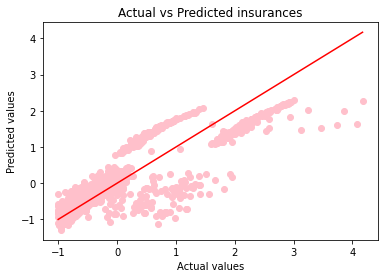

In [163]:
# let's represent the linear reg function
plt.scatter(y_normalized, y_pred, color='pink', label='Actual')
plt.plot([min(y_normalized), max(y_normalized)], [min(y_normalized), max(y_normalized)], color='red', label='Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted insurances')
plt.show()

In [164]:
# denormalizing the values to represent the actual numbers on graph

In [165]:
y_denormalized=denormalization(y_normalized,y_mean,y_std)
y_pred_denormalized=denormalization(y_pred,y_mean,y_std)

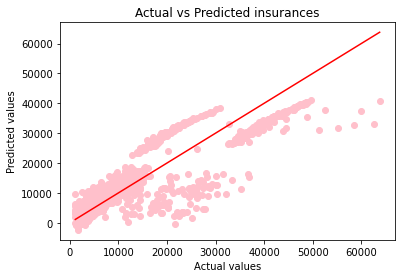

In [166]:
plt.scatter(y_denormalized, y_pred_denormalized, color='pink', label='Actual')
plt.plot([min(y_denormalized), max(y_denormalized)], [min(y_denormalized), max(y_denormalized)], color='red', label='actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted insurances')
plt.show()

Text(0.5, 1.0, 'Actual vs Predicted insurances')

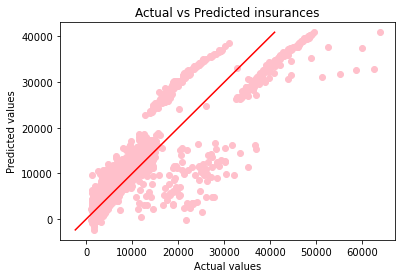

In [167]:
plt.scatter(y_denormalized, y_pred_denormalized, color='pink', label='Actual')
plt.plot([min(y_pred_denormalized), max(y_pred_denormalized)], [min(y_pred_denormalized), max(y_pred_denormalized)], color='red', label='predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted insurances')

### This graph illustrates the performance of a linear regression model by plotting actual insurance values in blue and predicted values in red.
### the two lines are not ahove each other directly as we score 0.75 , so we didn't get a perfect fit so the difference between them considered the error

Text(0.5, 1.0, 'Actual vs Predicted insurances')

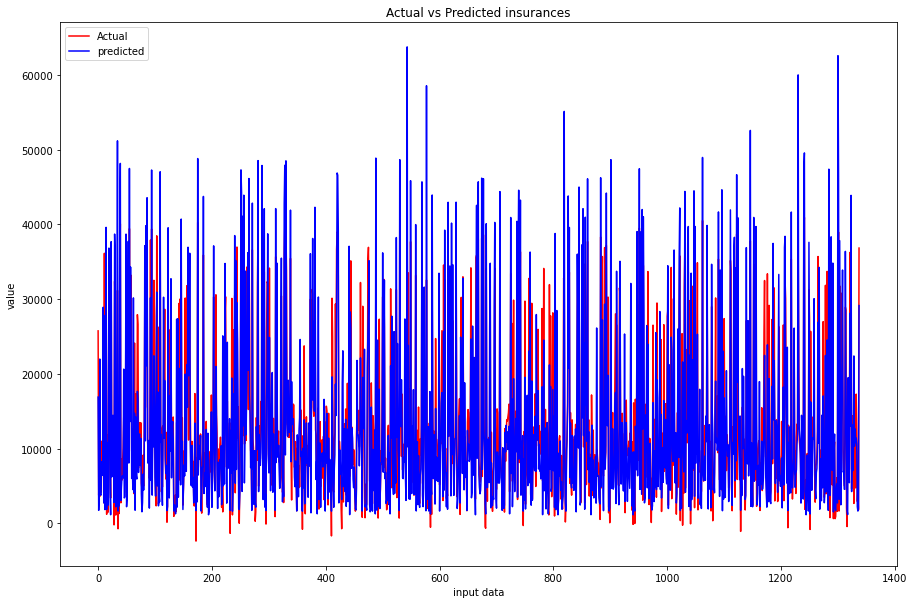

In [168]:
plt.figure(figsize=(15, 10))  # Adjust the width and height as needed
plt.plot(y_pred_denormalized, color='red', label='Actual') 
plt.plot(y_denormalized, color='blue', label='predicted')
plt.legend()
plt.xlabel('input data')
plt.ylabel('value')
plt.title('Actual vs Predicted insurances')